Quick file to demonstrate the formalism outlined here https://journals.aps.org/prxquantum/abstract/10.1103/PRXQuantum.3.020201

In [1]:
import numpy as np
import matplotlib.pyplot as plt

π = np.pi

First, just a simple mode in reflection. The matrix equation becomes just a scalar equation (see page 4)

$$
-i \gamma_A \Delta_A a\left[\omega_A^s\right]=\sqrt{\gamma_A^{\mathrm{ext}}} a^{\mathrm{in}}\left[\omega_A^s\right]
$$

We combine this with the following (just a scalar version of Eq. 7)

$$
S=i \frac{1}{\gamma_0} K \frac{1}{M} K- 1
$$

to get the single scattering parameter. 

This gives us (using definitions from paper)

$$
S = \frac{i \gamma_{ext} }{\omega^s - \omega + \frac{i \gamma}{2} } - 1
$$



In [80]:
ωs = np.linspace(3e9, 9e9, 1001)*2*π
γint = 0.01e9*2*π
γext = 1e9*2*π
γ = γint + γext
ω = 6e9*2*π

In [81]:
S = 1j* γext / (ωs - ω + 1j*γ/2) - 1

Text(0, 0.5, '$S_{11}$ Phase')

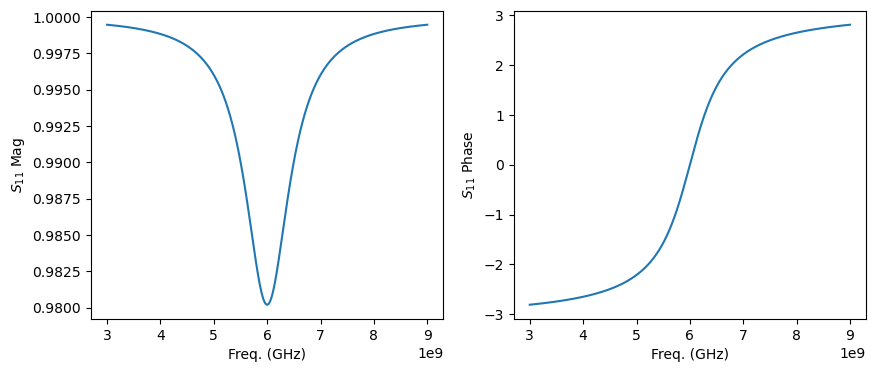

In [82]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,4))
axs[0].plot(ωs/(2*π), np.abs(S))
axs[0].set_xlabel('Freq. (GHz)')
axs[0].set_ylabel('$S_{11}$ Mag')

axs[1].plot(ωs/(2*π), np.angle(S))
axs[1].set_xlabel('Freq. (GHz)')
axs[1].set_ylabel('$S_{11}$ Phase')

0.9801980198019804


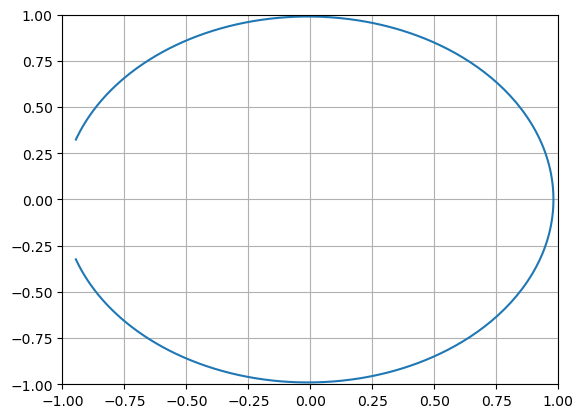

In [83]:
plt.plot(np.real(S), np.imag(S))
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.grid()
print(np.max(np.real(S)))

In [54]:
np.atanh(0)

np.float64(0.0)

Cool. Now let's imagine a mode structure of two passively coupled modes with different external losses. Nothing parametric yet.

Again, no conjugation, so we don't need the "dagger modes".

In [5]:
ω1 = np.linspace(3e9, 9e9, 101)*2*π
ωs =  2e9*2*π
ωo =  2e9*2*π
g2 =  2e9*2*π

γs_ext = 2e9*2*π
γs_int = 2e9*2*π
γo_ext = 2e9*2*π
γo_int = 2e9*2*π

γs = γs_int + γs_ext
γo = γo_int + γo_ext

In [6]:
M11 = ω1 - ωs + 1j*γs/2
M21 = g2/2
M12 = g2/2
M22 = ω1 - ωo + 1j*γo/2

det = M11*M22 - M21*M12
Minv11 = M22/det
Minv21 = -M21/det
Minv12 = -M12/det
Minv22 = M11/det

S11 = 1j*np.sqrt(γs_ext*γs_ext)*Minv11

## Conversion

In [7]:
ωk = np.array([4.9e9,4.9e9])*2*π
γintk = np.array([1e5,0.3e6])*2*π
γextk = np.array([2e6,5e6])*2*π
γk = γintk + γextk

ωs = np.linspace(4e9,8e9,10000)*2*π

γ0 = 1e8*2*π

cjk = np.array([[0,1.5e6],[1.5e6,0]])*2*π

K = np.diag(np.sqrt(γextk))

eye = np.diag(ωk*0+1)

Δk = 1/γ0 * (ωs[:,np.newaxis,np.newaxis]*eye-np.diag(ωk) + 1j*np.diag(γk)/2)

βjk = cjk/(2*γ0)

M = Δk + βjk

Minv = np.linalg.inv(M)

Son = 1j/γ0 * np.linalg.matmul(K, np.linalg.matmul(Minv,K)) - eye

#%%%


βjk = cjk/(2*γ0)*0

M = Δk + βjk

Minv = np.linalg.inv(M)

Soff = 1j/γ0 * np.linalg.matmul(K, np.linalg.matmul(Minv,K)) - eye

C:\Users\boris\AppData\Local\Temp\ipykernel_19600\3928914711.py:12: RuntimeWarning: divide by zero encountered in log10
  plt.plot(ωs/(2*π),20*np.log10(np.abs(S21off)),label='S21off')


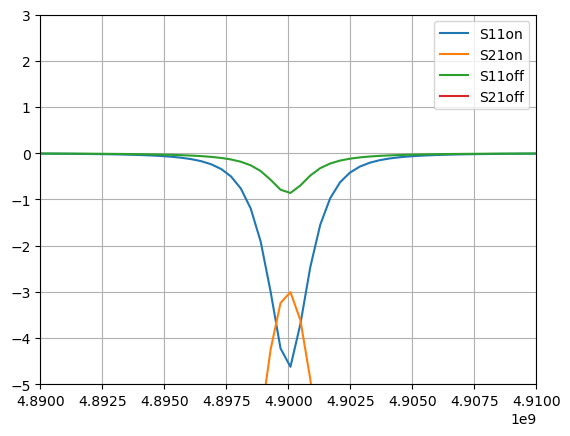

In [8]:
S11on = Son[:,0,0]
S21on = Son[:,1,0]
S12on = Son[:,0,1]
S22on = Son[:,1,1]
plt.plot(ωs/(2*π),20*np.log10(np.abs(S11on)),label='S11on')
plt.plot(ωs/(2*π),20*np.log10(np.abs(S21on)),label='S21on')
S11off = Soff[:,0,0]
S21off = Soff[:,1,0]
S12off = Soff[:,0,1]
S22off = Soff[:,1,1]
plt.plot(ωs/(2*π),20*np.log10(np.abs(S11off)),label='S11off')
plt.plot(ωs/(2*π),20*np.log10(np.abs(S21off)),label='S21off')
# plt.plot(ωs/(2*π),20*np.log10(np.abs(S12)),label='S12')
# plt.plot(ωs/(2*π),20*np.log10(np.abs(S22)),label='S22')
plt.xlim([4.89e9,4.91e9])
plt.ylim([-5,3])
plt.grid()
plt.legend()



## Gain

In [9]:
ωk = np.array([5e9,5e9])*2*π
γintk = np.array([0e7,0e7])*2*π
γextk = np.array([6e8,6e8])*2*π
γk = γintk + γextk

ωs = np.linspace(4e9,8e9,1000)*2*π

γ0 = 1e9*2*π

cjk = np.array([[0,5.5e8],[-5.5e8,0]])*2*π

K = np.diag(np.sqrt(γextk))

eye = np.diag(ωk*0+1)

Δk = 1/γ0 * (ωs[:,np.newaxis,np.newaxis]*eye-np.diag(ωk) + 1j*np.diag(γk)/2)

βjk = cjk/(2*γ0)

M = Δk + βjk

Minv = np.linalg.inv(M)

S = 1j/γ0 * np.linalg.matmul(K, np.linalg.matmul(Minv,K)) - eye

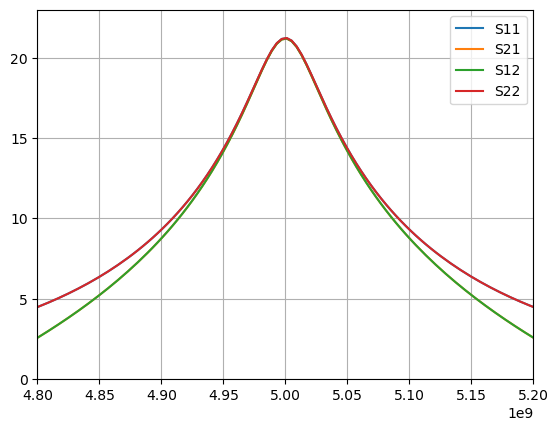

In [10]:
S11 = S[:,0,0]
S21 = S[:,1,0]
S12 = S[:,0,1]
S22 = S[:,1,1]
plt.plot(ωs/(2*π),20*np.log10(np.abs(S11)),label='S11')
plt.plot(ωs/(2*π),20*np.log10(np.abs(S21)),label='S21')
plt.plot(ωs/(2*π),20*np.log10(np.abs(S12)),label='S12')
plt.plot(ωs/(2*π),20*np.log10(np.abs(S22)),label='S22')
plt.xlim([4.8e9,5.2e9])
plt.ylim([0,23])
plt.grid()
plt.legend()

## Mode-assisted transmission

In [49]:
ωk = np.array([5e9,10e9])*2*π
γintk = np.array([0e7,0e7])*2*π
γextk = np.array([3e7,3e7])*2*π
γk = γintk + γextk

ωs = np.linspace(4e9,8e9,1000)*2*π

γ0 = 1e9*2*π

cjk = np.array([[0,50e6],[50e6,0]])*2*π

K = np.diag(np.sqrt(γextk)) + np.sqrt(0e4*2*π)

eye = np.diag(ωk*0+1)

Δk = 1/γ0 * (ωs[:,np.newaxis,np.newaxis]*eye-np.diag(ωk) + 1j*np.diag(γk)/2)

βjk = cjk/(2*γ0)

M = Δk + βjk

Minv = np.linalg.inv(M)

S = 1j/γ0 * np.linalg.matmul(K, np.linalg.matmul(Minv,K)) - eye

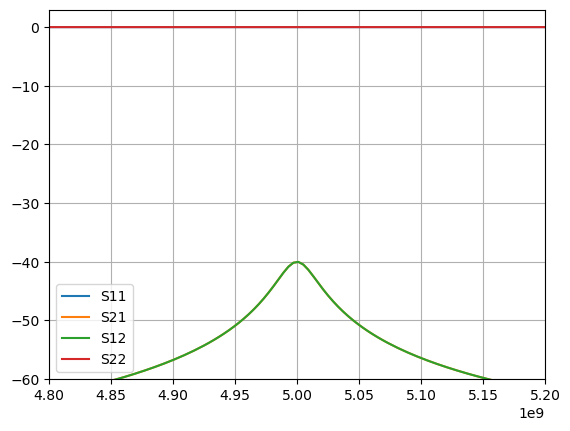

In [50]:
S11 = S[:,0,0]
S21 = S[:,1,0]
S12 = S[:,0,1]
S22 = S[:,1,1]
plt.plot(ωs/(2*π),20*np.log10(np.abs(S11)),label='S11')
plt.plot(ωs/(2*π),20*np.log10(np.abs(S21)),label='S21')
plt.plot(ωs/(2*π),20*np.log10(np.abs(S12)),label='S12')
plt.plot(ωs/(2*π),20*np.log10(np.abs(S22)),label='S22')
plt.xlim([4.8e9,5.2e9])
plt.ylim([-60,3])
plt.grid()
plt.legend()